In [453]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
import cv2
import numpy as np
from PIL import Image
from IPython.display import Image as IMG

In [454]:
#顏色
color_dict = {"black": [0, 0, 0], 
              "red": [0, 0, 255]}

In [455]:
global roi_src
global well_src
roi_src = "Photos/ROI_image.png"
well_src = "Photos/result_well.png"

In [456]:
def gray2rgb(gray,color_dict):
    
    # 定義新涵式
    rgb_image = np.zeros(shape=(*gray.shape, 3))
    # 上色
    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            #不同的灰度值上不同的顏色
            if gray[i, j] < 127:
                rgb_image[i, j, :] = color_dict["black"]
            else:
                rgb_image[i, j, :] = color_dict["red"]

    return rgb_image.astype(np.uint8)

In [457]:
def addImage():
    well = cv2.imread(well_src)
    roi_r = cv2.imread("Photos/ROI_image_new.png")

    h, w, _ = well.shape
    
    img = cv2.resize(roi_r, (w,h))

    alpha = 0.5
    beta = 1-alpha
    gamma = 1
    merge = cv2.addWeighted(well, alpha, img, beta, gamma)
    
    cv2.imwrite("Photos/merge_finish.png",merge)
    print("-"*20+"新的ROI"+"-"*20)
    display(IMG("Photos/ROI_image_new.png"))
    print("-"*20+"疊圖完成"+"-"*20)
    display(IMG("Photos/merge_finish.png"))


In [458]:
def main():
    roi= cv2.imread(roi_src,0)
    print("-"*20+"well槽"+"-"*20)
    display(IMG(well_src))
    print("-"*20+"原本ROI"+"-"*20)
    display(IMG(roi_src))
    ret, th = cv2.threshold(roi, 70, 255, cv2.THRESH_BINARY)
    new_roi = gray2rgb(th, color_dict)
    cv2.imwrite("Photos/ROI_image_new.png",new_roi)
    addImage()

--------------------well槽--------------------


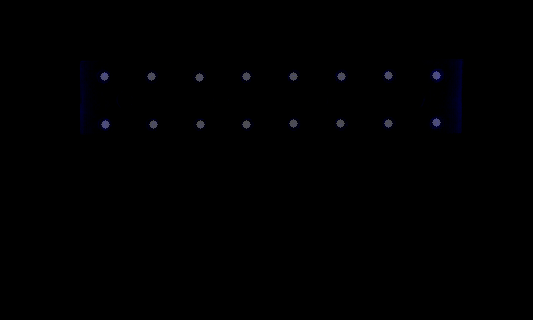

--------------------原本ROI--------------------


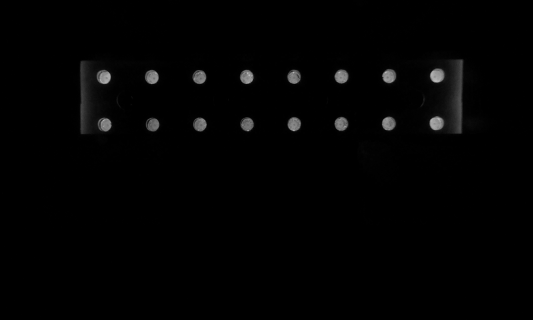

--------------------新的ROI--------------------


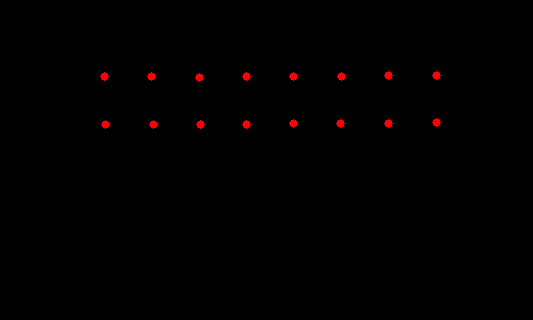

--------------------疊圖完成--------------------


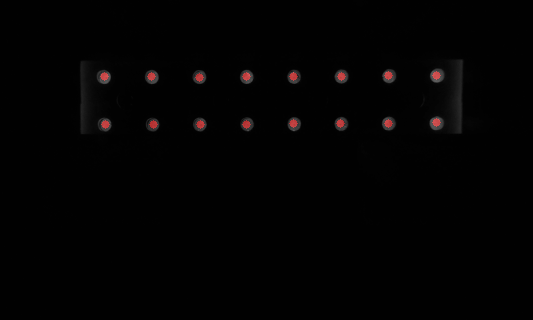

In [459]:
if __name__ == '__main__':
    main()
    